# Advanced Feature Selection

https://www.kdnuggets.com/2023/06/advanced-feature-selection-techniques-machine-learning-models.html

## Filter based

- Information Gain
- Chi-Square
- Fisher's Score

Information Gain

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import mutual_info_regression

# Load the diabetes dataset
data = load_diabetes()

# Split the dataset into features and target
X = data.data
y = data.target

In [24]:
print(X.shape)
print(y.shape)
X_stacked = np.hstack((X, y.reshape(-1,1)))
X_stacked

(442, 10)
(442,)


array([[ 3.80759064e-02,  5.06801187e-02,  6.16962065e-02, ...,
         1.99074862e-02, -1.76461252e-02,  1.51000000e+02],
       [-1.88201653e-03, -4.46416365e-02, -5.14740612e-02, ...,
        -6.83315471e-02, -9.22040496e-02,  7.50000000e+01],
       [ 8.52989063e-02,  5.06801187e-02,  4.44512133e-02, ...,
         2.86130929e-03, -2.59303390e-02,  1.41000000e+02],
       ...,
       [ 4.17084449e-02,  5.06801187e-02, -1.59062628e-02, ...,
        -4.68825342e-02,  1.54907302e-02,  1.32000000e+02],
       [-4.54724779e-02, -4.46416365e-02,  3.90621530e-02, ...,
         4.45287288e-02, -2.59303390e-02,  2.20000000e+02],
       [-4.54724779e-02, -4.46416365e-02, -7.30303027e-02, ...,
        -4.22151394e-03,  3.06440941e-03,  5.70000000e+01]])

In [25]:
columns_df = data.feature_names + ['target']
columns_df

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']

In [27]:
df = pd.DataFrame(X_stacked, columns=columns_df)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [28]:
# Apply Information Gain
ig = mutual_info_regression(X, y)


In [34]:
df_ig = pd.DataFrame({'Feature_Names': data.feature_names, 'Info_Gain': ig}).set_index('Feature_Names')
df_ig.sort_values('Info_Gain', ascending=False).style.bar()

,Info_Gain
Feature_Names,
bmi,0.172175
s5,0.149907
s6,0.118368
s4,0.099466
s1,0.068069
s3,0.061103
bp,0.055154
sex,0.034117
s2,0.014654


Use a dictionairy to store the result of the info gain

In [39]:
feature_score = {data.feature_names[i]:ig[i] for i in range(len(ig))}
feature_score


{'age': 0.0,
 'sex': 0.034116535497766165,
 'bmi': 0.17217540855096347,
 'bp': 0.055153769432680466,
 's1': 0.06806858621367118,
 's2': 0.014654068288125988,
 's3': 0.0611031526351451,
 's4': 0.09946611158865659,
 's5': 0.14990671812336887,
 's6': 0.11836776761423673}

In [45]:
sorted_features = sorted(feature_score.items(), key=lambda x: x[1], reverse=True)
for feature, value in sorted_features:
    print('Feature: ', feature,' Value: ', value)

Feature:  bmi  Value:  0.17217540855096347
Feature:  s5  Value:  0.14990671812336887
Feature:  s6  Value:  0.11836776761423673
Feature:  s4  Value:  0.09946611158865659
Feature:  s1  Value:  0.06806858621367118
Feature:  s3  Value:  0.0611031526351451
Feature:  bp  Value:  0.055153769432680466
Feature:  sex  Value:  0.034116535497766165
Feature:  s2  Value:  0.014654068288125988
Feature:  age  Value:  0.0


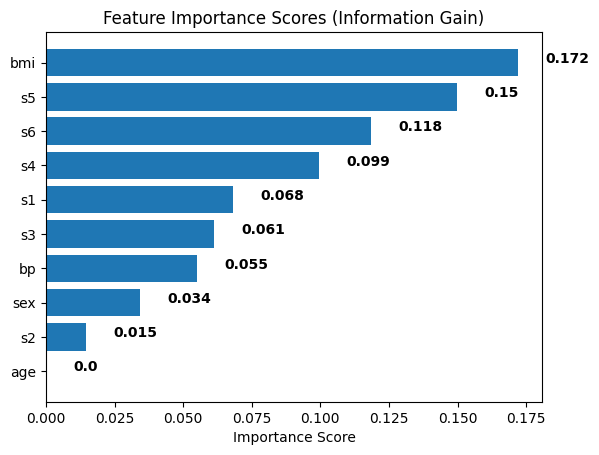

In [46]:
# Plot a horizontal bar chart of the feature importance scores
fig, ax = plt.subplots()
y_pos = np.arange(len(sorted_features))
ax.barh(y_pos, [score for feature, score in sorted_features], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features])
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel("Importance Score")
ax.set_title("Feature Importance Scores (Information Gain)")

# Add importance scores as labels on the horizontal bar chart
for i, v in enumerate([score for feature, score in sorted_features]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")
plt.show()

**Chi-Square**

While the Chi-square test is a commonly used feature selection method, it is typically used for categorical data, where the features and target variables are discrete.

Code for Chi-Square is missing so far

**Fisher's Score**

Fisher's Discriminant Ratio, commonly known as Fisher's Score, is a feature selection approach that ranks features based on their ability to differentiate various classes in a dataset. It may be used for continuous features in a classification problem.

Fisher's Score is calculated as the ratio of between-class and within-class variance. A higher Fisher's Score implies the characteristic is more discriminative and valuable for classification.

## Wrapper Based Approach

- Forward Selection
- Backward Selection
- Exhaustive Feature Selection
- Recursive Feature Elimination

**Forward Selection**

In forward selection, you start with an empty feature set and iteratively add features to the set. At each step, you evaluate the model's performance with the current feature set and the additional feature. The feature that results in the best performance improvement is added to the set.

We use mlxtend but there is a new transformer in sklearn:

https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_24_0.html#sphx-glr-auto-examples-release-highlights-plot-release-highlights-0-24-0-py

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Load the breast cancer dataset
data = load_breast_cancer()

# Split the dataset into features and target
X = data.data
y = data.target

In [2]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the logistic regression model
model = LogisticRegression()

In [3]:
# Define the forward selection object
sfs = SFS(model,
          k_features=5,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=5)

In [4]:
# Perform forward selection on the training set
sfs.fit(X_train, y_train)

c:\Users\Martin Biber\Dropbox\pythonvenv\DataScience\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Martin Biber\Dropbox\pythonvenv\DataScience\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

SequentialFeatureSelector(estimator=LogisticRegression(), k_features=(5, 5),
                          scoring='accuracy')

In [5]:
# Print the selected features
print('Selected Features:', sfs.k_feature_names_)

# Evaluate the performance of the selected features on the testing set
accuracy = sfs.k_score_
print('Accuracy:', accuracy)

Selected Features: ('0', '1', '4', '21', '22')
Accuracy: 0.9548417721518987


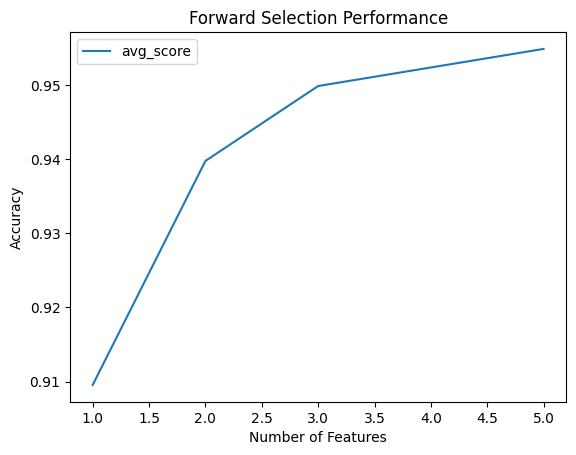

In [8]:
# Plot the performance of the model with different feature subsets
sfs_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sfs_df['avg_score'] = sfs_df['avg_score'].astype(float)
fig, ax = plt.subplots()
sfs_df.plot(kind='line', y='avg_score', ax=ax)
ax.set_xlabel('Number of Features')
ax.set_ylabel('Accuracy')
ax.set_title('Forward Selection Performance')
plt.show()

In [22]:
sfs_selected_columns = list(map(int, sfs.k_feature_names_))
sfs_selected_columns

[0, 1, 4, 21, 22]

In [25]:
list(data.feature_names[sfs_selected_columns])

['mean radius',
 'mean texture',
 'mean smoothness',
 'worst texture',
 'worst perimeter']

**Backward Selection**

This is explained here: \
https://scikit-learn.org/stable/modules/feature_selection.html#recursive-feature-elimination

**Exhaustive Feature Selection**

**Recursive Feature Selection**

## Embedded Approach

- Regularization
- Random Forest Importance

**Regularization**

L1 and L2

**Random Forest Importance**

In [26]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the Covertype dataset
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz", header=None)

# Assign column names
cols = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
        "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
        "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
        "Horizontal_Distance_To_Fire_Points"] + ["Wilderness_Area_"+str(i) for i in range(1,5)] + ["Soil_Type_"+str(i) for i in range(1,41)] + ["Cover_Type"]

data.columns = cols

HTTPError: HTTP Error 404: Not Found

In [ ]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a random forest classifier object
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rfc.fit(X_train, y_train)

# Get feature importances from the trained model
importances = rfc.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]


# Select the top 10 features
num_features = 10
top_indices = indices[:num_features]
top_importances = importances[top_indices]


# Print the top 10 feature rankings
print("Top 10 feature rankings:")
for f in range(num_features):  # Use num_features instead of 10
    print(f"{f+1}. {X_train.columns[indices[f]]}: {importances[indices[f]]}")

In [ ]:
# Plot the top 10 feature importances in a horizontal bar chart
plt.barh(range(num_features), top_importances, align='center')
plt.yticks(range(num_features), X_train.columns[top_indices])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

## Unsupervised Feature Selection Techniques

These are the methods from the article. In my opinion (and ChatGPT) some of them are Feature Extracting Methods. Feature extraction methods, such as Principal Component Analysis (PCA) and Autoencoders, create new features by combining the original features in a way that captures the most significant variations in the data. These methods aim to find a lower-dimensional representation that retains as much of the original data's variability as possible. \
Others are Feature Projection Methods. Feature projection methods, like Linear Discriminant Analysis (LDA) and t-distributed Stochastic Neighbor Embedding (t-SNE), project the original features onto a lower-dimensional space while preserving certain properties, such as class separability or local neighborhood relationships. These methods are particularly useful for visualization purposes or when the focus is on maintaining specific structural characteristics of the data.

- PCA
- ICA
- NMF
- t-SNE
- Autoencoder

Common unsupervised feature selection methods include techniques like correlation analysis, information gain, mutual information, and clustering-based approaches. These methods typically evaluate the statistical relationships or similarities between features to determine their importance or redundancy.

### PCA

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names

In [28]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [30]:
# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

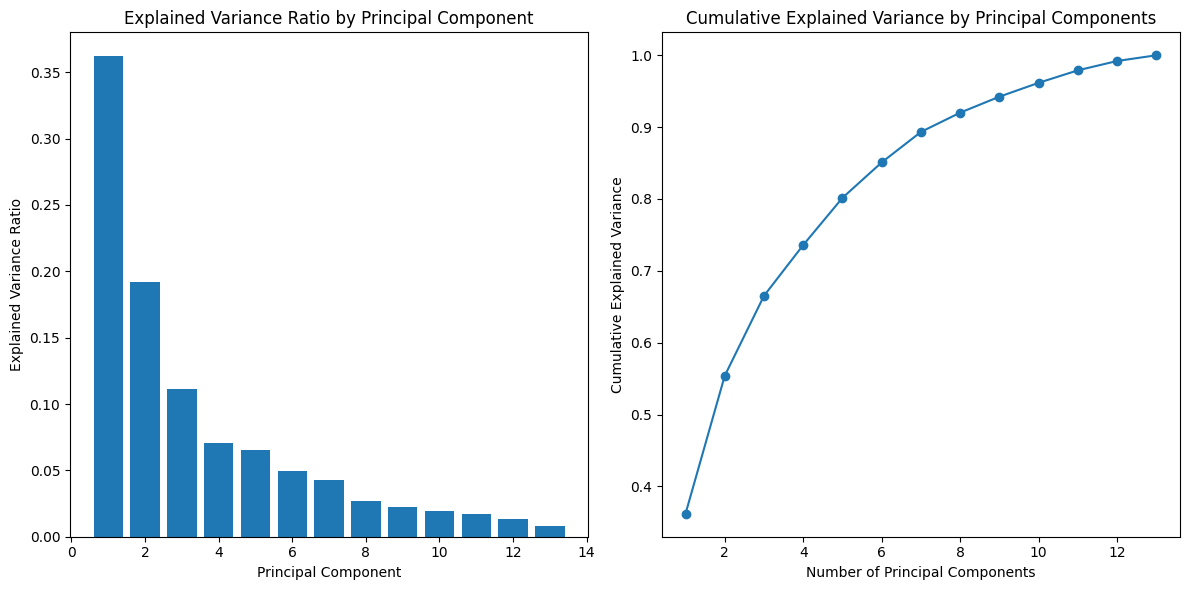

In [32]:
# Create a 2x1 grid of subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the explained variance ratio in the first subplot
ax1.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Explained Variance Ratio by Principal Component')

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance in the second subplot
ax2.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
ax2.set_xlabel('Number of Principal Components')
ax2.set_ylabel('Cumulative Explained Variance')
ax2.set_title('Cumulative Explained Variance by Principal Components')

# Display the figure
plt.tight_layout()
plt.show()

**Independent Component Analysis**

**Non-Negative Matrix Factoization (NMF)**

**t-distributed Stochastic Neighbor Embedding (t-SNE)**
 

**Autoencoder**